### project 3- DSC680 

### Happiness 2020
soukhna Wade
11/01/2020

### Introduction

There are three parts to my report as follows:

** Cleaning
** Visualization
** Random Forest

The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. We also will implement several machine learning algorithms to predict the happiness score and compare the result to discover which algorithm works better for this specific dataset.

 https://www.kaggle.com/pinarkaya/world-happiness-eda-visualization-ml#2019-Data
 
 https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv
              


### Import necessary Libraries

In [7]:
# Standard library import-Python program# for some basic operations
import pandas as pd 
import numpy as np                 # linear algebra

import matplotlib.pyplot as plt    # for graphics
import seaborn as sns              # for visualizations
plt.style.use('fivethirtyeight')                

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Use to configure display of graph
%matplotlib inline 

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

### Import and read Dataset from local library

In [65]:
#The following command imports the CSV dataset using pandas:
import pandas as pd 

happyness_2020 = pd.read_csv("happyness_2020.csv")

happyness_2020.head(1) 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835


In [9]:
#happyness_2020.columns

**Looking at the current shape of the dataset under consideration**

In [10]:
# Looking at the current shape of the dataset under consideration
#df.shape   

# Step 2:  check the dimension of the table or the size of dataframe

print("The dimension of the table is: ",happyness_2020.shape)

The dimension of the table is:  (153, 20)


### Cleaning - Is threre any missing  or null Values in this dataset (happyness_2020)?

In this section, we load our dataset and see the structure of happiness variables. Our dataset is pretty clean, and we will implement a few adjustments to make it looks better.

In [11]:
#check for any missing values or null values (NA or NaN)
happyness_2020 .isnull().sum()
#df.isnull().head(6)

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

** Note that in the above result no missing values so, the dataset is pretty cleaned.**

In [68]:
# Print a list datatypes of all columns 
  
happyness_2020.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857,2.762835


# Exploratory Data Analysis

**Prints information of all columns:**

In [13]:
happyness_2020 .info() # Prints information of all columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

**Display some statistical summaries of the numerical columns data. 
 To see the statistical details of the dataset, we can use describe():**

In [14]:
happyness_2020 .describe().head(1)     # display some statistical summaries of the numerical columns data.

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0,153.0


In [15]:
#happyness_2020.columns               # display the list of the columns

###  Let us examine the data for the county very happy and the one that is not 

In [16]:
maxSupport=np.max(happyness_2020["Social support"])
maxSupport

0.9746695759999999

In [17]:
maxEconomy=np.max(happyness_2020["Logged GDP per capita"])
maxEconomy

11.45068073

In [18]:
happyness_2020[happyness_2020['Ladder score']==np.max(happyness_2020['Ladder score'])]['Country name']

0    Finland
Name: Country name, dtype: object

In [19]:
maxSupport=np.min(happyness_2020["Social support"])
maxSupport

0.31945985600000004

In [20]:
minEconomy=np.min(happyness_2020["Logged GDP per capita"])
minEconomy

6.492642403

In [21]:
happyness_2020[happyness_2020['Ladder score']==np.min(happyness_2020['Ladder score'])]['Country name']

152    Afghanistan
Name: Country name, dtype: object

**To rename columns**

In [22]:
happyness_2020 .rename(columns={"Country name":"Country",
                      "Logged GDP per capita":"GDP per capita",
                      "Explained by: Healthy life expectancy":"Health",
                      "Freedom to make life choices":"Freedom",
                      "Overall rank":"Happiness Rank"},inplace=True)
#happyness_2020 .columns

**Removing unnecessary columns (Freedom to make life choices and Healthy life expectancy)**

In [23]:
#''' drop multiple column based on name in pandas'''

d2020=happyness_2020.drop(['Regional indicator','Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
                            'Ladder score in Dystopia', 'Explained by: Social support',
                            'Explained by: Freedom to make life choices',
                            'Explained by: Generosity', 'Explained by: Perceptions of corruption',
                            'Dystopia + residual','Explained by: Log GDP per capita'], axis='columns')
d2020.head(1)

,Country,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Health
0,Finland,7.8087,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,0.961271


In [24]:
d2020.shape

(153, 9)

In [25]:
d2020.columns

Index(['Country', 'Ladder score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Health'],
      dtype='object')

In [26]:
d2020.head(1)

,Country,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Health
0,Finland,7.8087,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,0.961271


# Visualization

### The correlation of the variables of the dataset - Heatmap

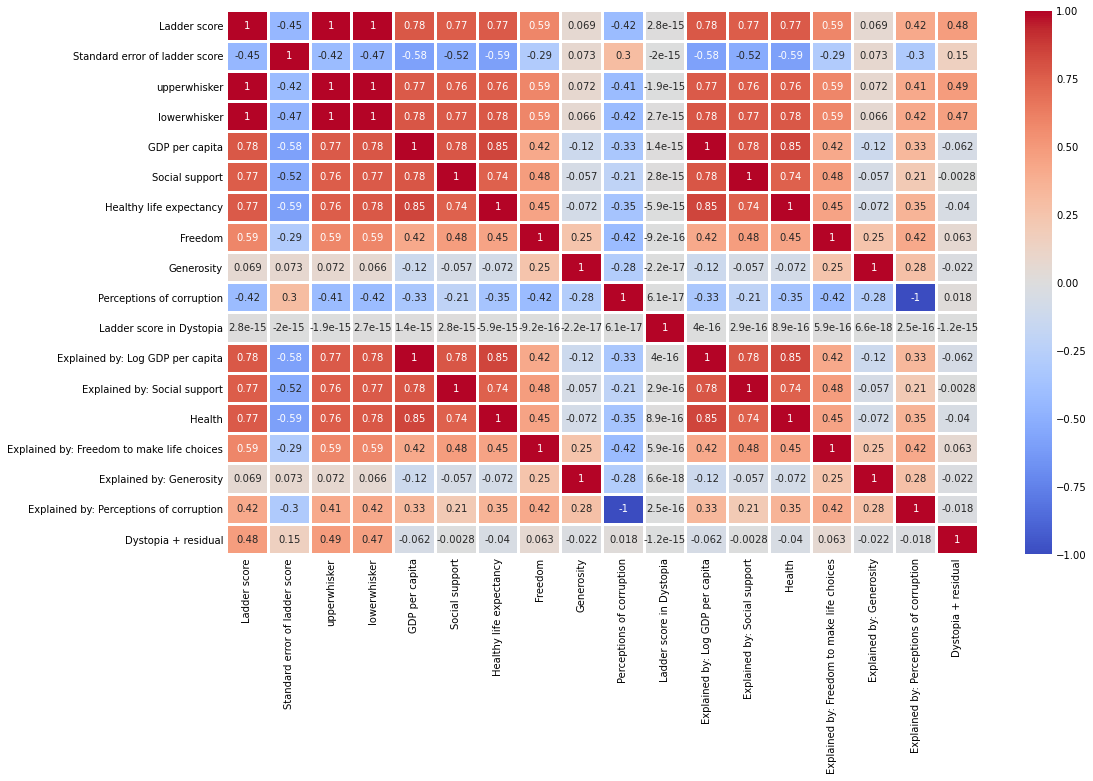

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(happyness_2020 .corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

There is an inverse correlation between “Ladder score” and all the other numerical variables. The lower the happiness score, the higher the score, and the higher the other factors that contribute to happiness.



### The correlation of the new dataset  after renaming and droping columns- Heatmap

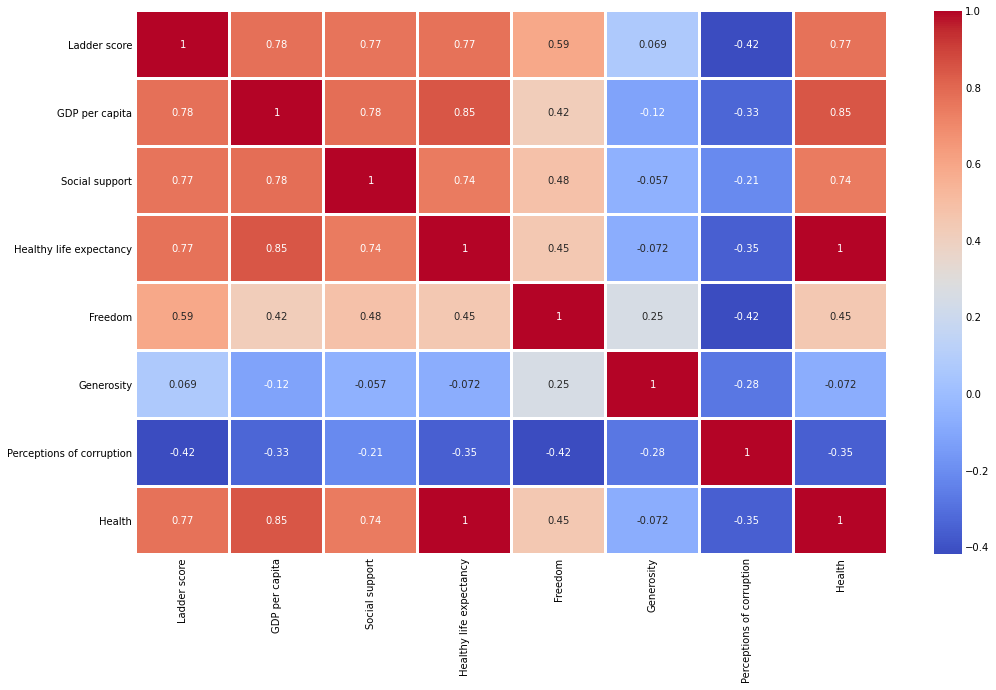

In [28]:
#The correlation of the new dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(d2020.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

According to the above correlation plot, GPA per capita, social support, and healthy life expectancy play the most significant role in contributing to happiness. While perceptions of corruption have the lowest impact on the happiness score.

#  Let's see relationship between different features with happiness score.

### 1. GDP per capita

Relationship between GDP per capita(Economy of country) has postive strong relationship with happiness score.
So If GDP per Capita of a country is high than Happiness Score of that country also more likely to be high.

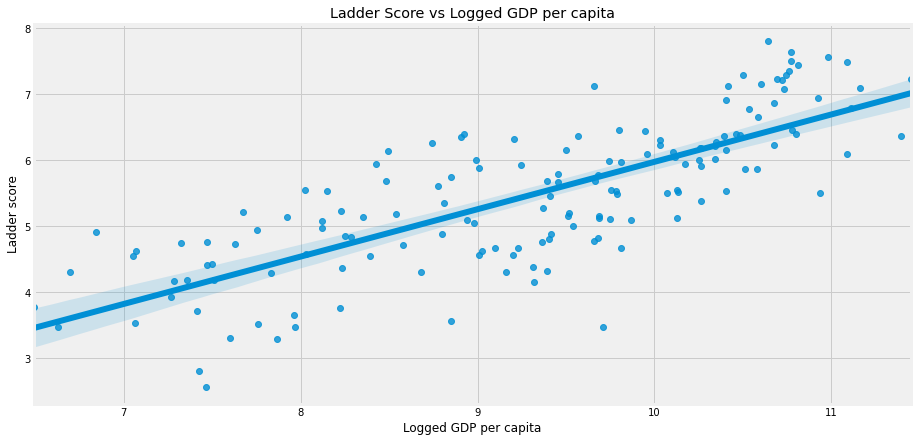

In [29]:
#https://www.kaggle.com/dgtech/world-happiness-with-basic-visualization-and-eda
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd 

happyness_2020 = pd.read_csv("happyness_2020.csv")

plt.figure(figsize=(14,7))

plt.title("Ladder Score vs Logged GDP per capita")
sb.regplot(data=happyness_2020, x='Logged GDP per capita', y='Ladder score');

***Using the histogram helps us to make the decision making process a lot more easy to handle by viewing the data that was collected***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DB3454A00>,
      dtype=object)

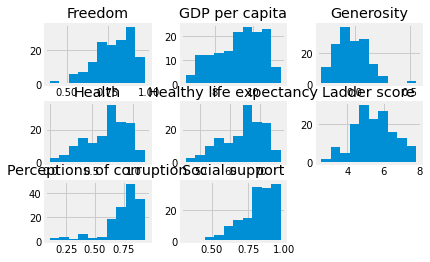

In [30]:
d2020.hist()

### How is the Happiness Score is distributed?

As you can see below ladder score (happiness score) has values above 2.50 and below 7.77. So there is no single country which has a happiness score above 8.

,Country,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Health
0,Finland,7.8087,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,0.961271


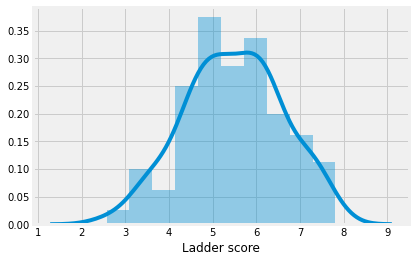

In [31]:
sns.distplot(d2020['Ladder score'])
d2020.head(1)

### Top 6 Countries with high GDP (Economy)

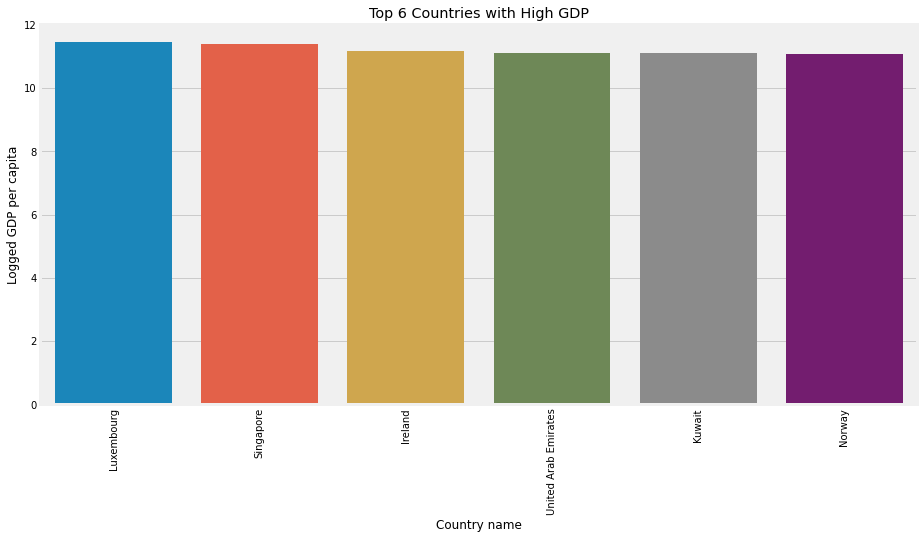

In [32]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High GDP")
sb.barplot(data = happyness_2020.sort_values('Logged GDP per capita', ascending= False).head(6), y='Logged GDP per capita', x='Country name')
plt.xticks(rotation=90);

### 2. Perceptions of corruption

Distribution of Perceptions of corruption rightly skewed, which means very less number of country has high perceptions of corruption. That means most of the country has corruption problem.

Corruption is a very big problem for the word.
How corruption can impact on Happiness Score?

Perceptions of corruption data is highly skewed no wonder why the data has weak linear relationship, but as you can see in scatter plot most of the data points are on left side and most of the countries with low perceptions of corruption has happiness score between 4 to 6.

Countries with high perception score has high happiness score above 7.

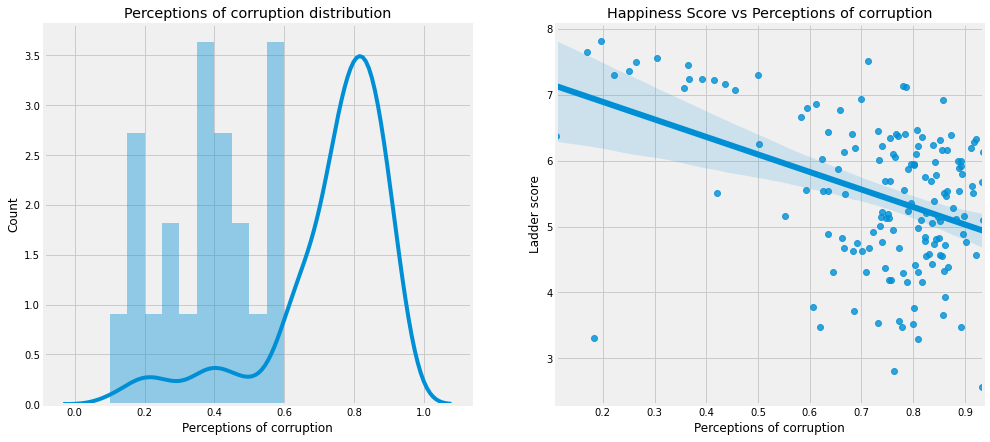

In [33]:
plt.figure(figsize= (15,7))

plt.subplot(1,2,1)
plt.title("Perceptions of corruption distribution")
sb.distplot(a=happyness_2020['Perceptions of corruption'], bins =np.arange(0, 0.45+0.2,0.05))
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title("Happiness Score vs Perceptions of corruption")
sb.regplot(data=happyness_2020, x='Perceptions of corruption', y='Ladder score');


### Top 6 Countries with high Perceptions of corruption in the year 2020

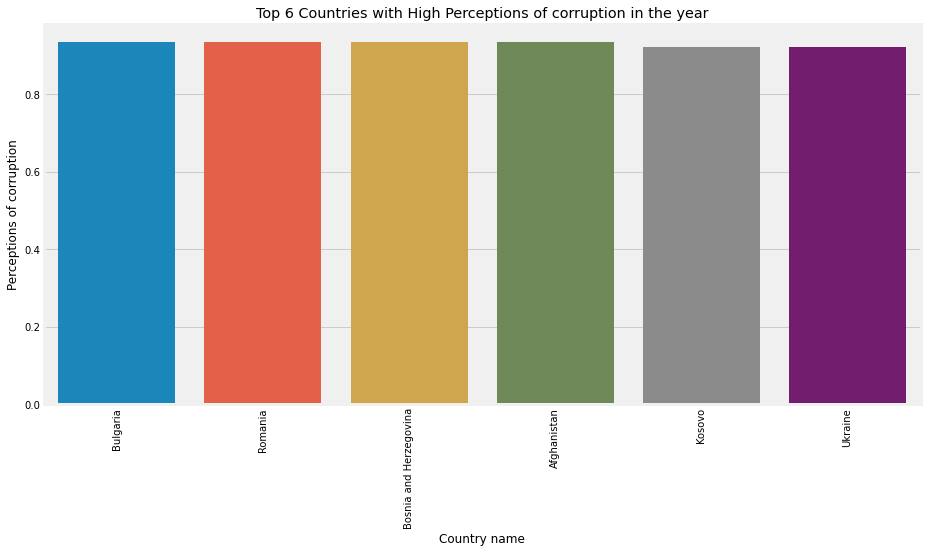

In [34]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Perceptions of corruption in the year")
sb.barplot(data =happyness_2020.sort_values('Perceptions of corruption', ascending= False).head(6), x='Country name', y='Perceptions of corruption')
plt.xticks(rotation=90);

### 3. Healthy life expectancy

A healthy life expectancy has a strong and positive relationship with a happiness score. If a country has a high life expectancy that means it can also have a high happiness score. It makes sense because anyone who has a very long healthy life he/she is happy. Everyone likes to get a healthy and long life aren't you?

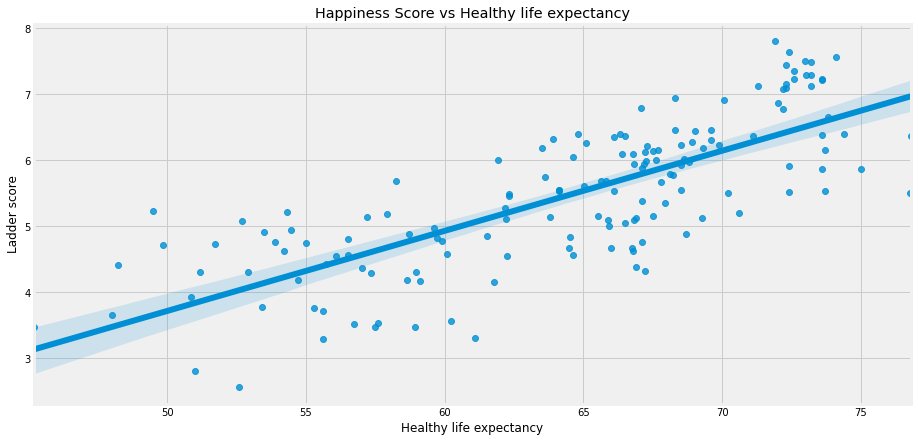

In [35]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Healthy life expectancy")
sb.regplot(data=happyness_2020, x='Healthy life expectancy', y='Ladder score');

### Top 6 Countries with high Healthy life expectancy  in the year 2020

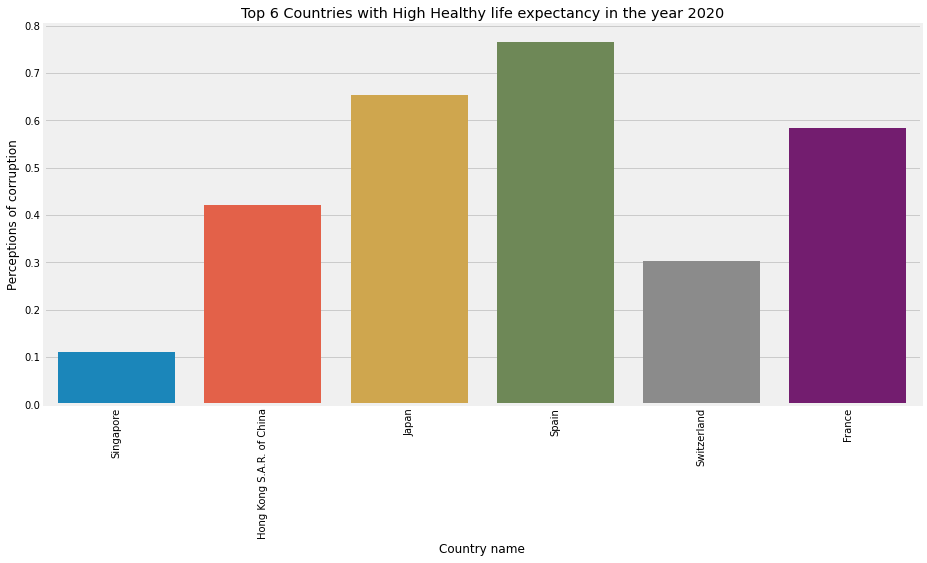

In [36]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Healthy life expectancy in the year 2020")
sb.barplot(data = happyness_2020.sort_values('Healthy life expectancy', ascending= False).head(6), x='Country name', y='Perceptions of corruption')
plt.xticks(rotation=90);

### 4. Social Support

Social support of countries also has a strong and positive relationship with happiness scores. 
Also, the relationship with happiness or ladder score needs to be strong because the more you will help socially more you will be happy.

Social support measures the perception that one has assistance available, the received assistance, or the degree to which a person can integrate into a social network. Support can come from many sources, such as family, friends, pets, neighbors, coworkers, etc.



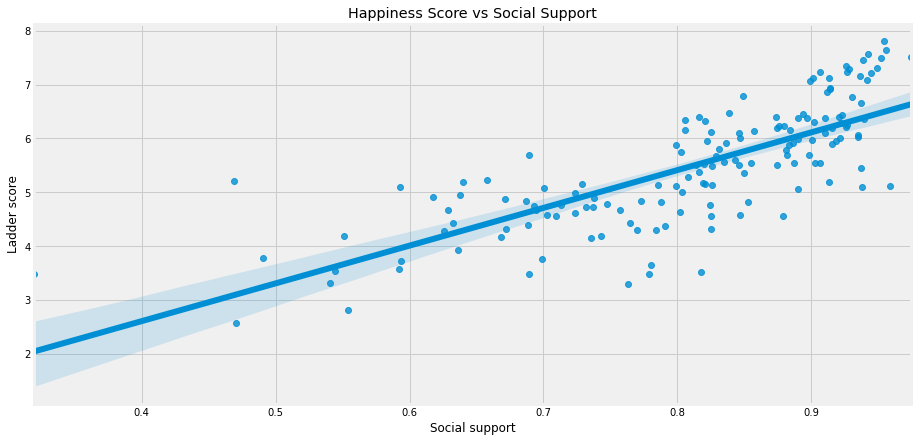

In [37]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
import pandas as pd 

happyness_2020 = pd.read_csv("happyness_2020.csv")
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Social Support")
sb.regplot(data=happyness_2020, x='Social support', y='Ladder score');

### Top 6 Countries with high Social Support in year 2020

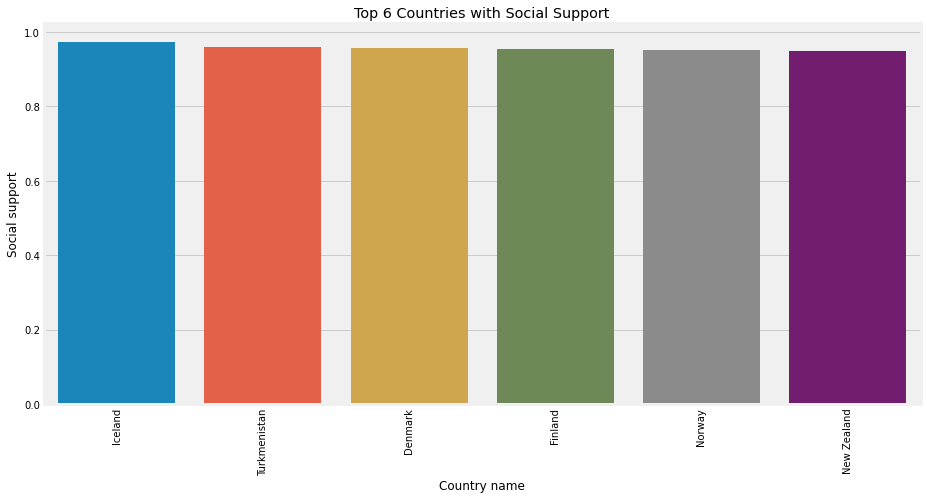

In [38]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with Social Support")
sb.barplot(data = happyness_2020.sort_values('Social support', ascending= False).head(6), x='Country name', y='Social support')
plt.xticks(rotation=90);


### Freedom to make life choices

“Freedom to make life choices” is the national average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Freedom to make life choices has some positive relationships with happiness scores. This relation makes sense because the more you will get free to make decisions about your life, the more you will be happy.

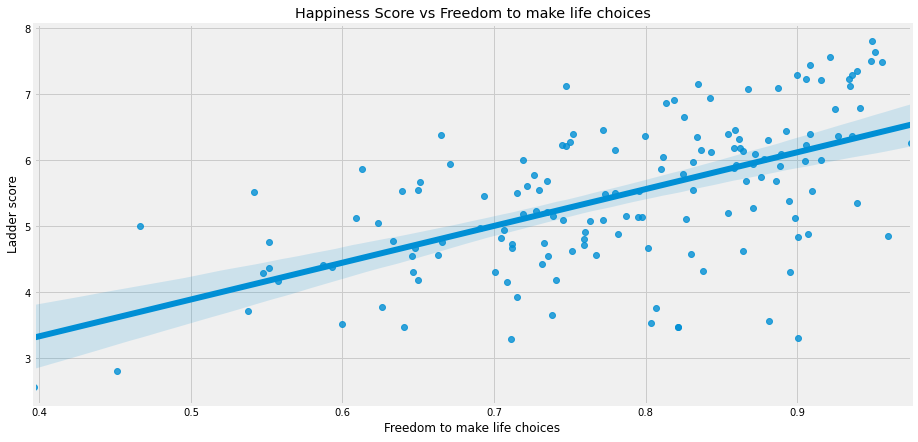

In [39]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Freedom to make life choices")
sb.regplot(data=happyness_2020, x='Freedom to make life choices', y='Ladder score');

### The top 6 countries with high freedom to make life choices

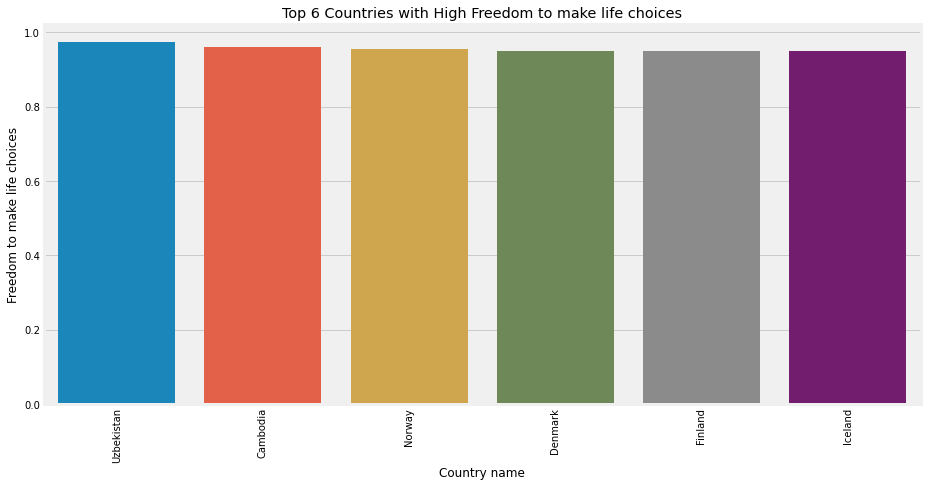

In [40]:
plt.figure(figsize=(14,7))
plt.title("Top 6 Countries with High Freedom to make life choices")
sb.barplot(data = happyness_2020.sort_values('Freedom to make life choices', ascending= False).head(6), x='Country name', y='Freedom to make life choices')
plt.xticks(rotation=90);

### 6. Generosity

The generosity and life expectancy are among the six variables scientists peek at when making the World Happiness Report.

Generosity has a weak linear relationship with the ladder score. One can ask a question:" Why the word "generosity" has not a linear relationship with happiness score?

The reason is that the generosity score depends on the countries that can give the most to nonprofits around the world. Countries which are not generous that does not mean they are not happy.

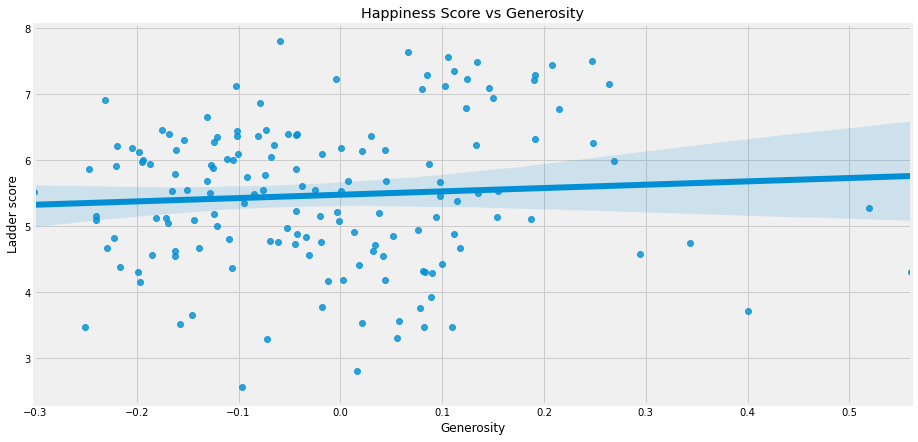

In [41]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Generosity")
sb.regplot(data=happyness_2020, x='Generosity', y='Ladder score');

### The top 6 countries with high generosity

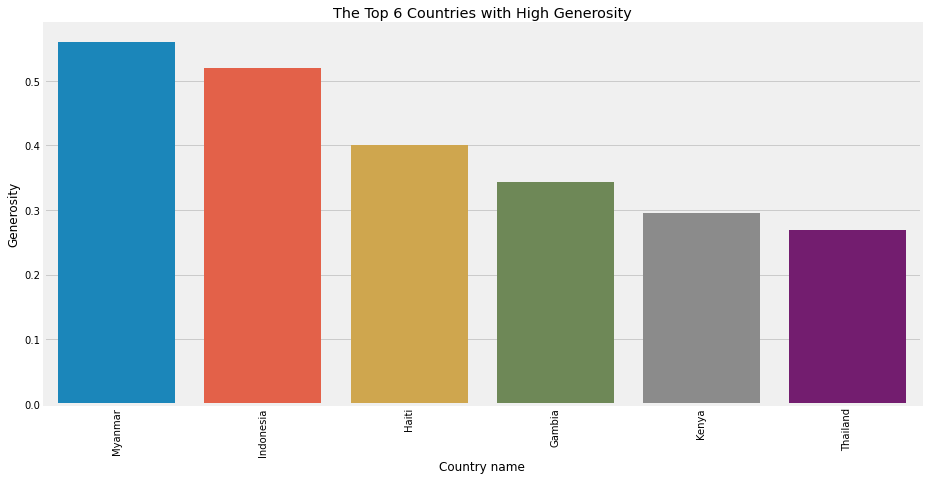

In [42]:
plt.figure(figsize=(14,7))

plt.title("The Top 6 Countries with High Generosity")
sb.barplot(data = happyness_2020.sort_values('Generosity', ascending= False).head(6), x='Country name', y='Generosity')
plt.xticks(rotation=90);

### How one feature is related to another feature?

In [43]:
#p = sb.PairGrid(happyness_2020)
#p.map_diag(plt.hist)
#p.map_offdiag(plt.scatter);

### Multiple Linear Regression in Python

It is the most common form of Linear Regression. Multiple Linear Regression describes how a single response variable Y depends linearly on a number of predictor variables.
Consider ‘Ladder score’ as the dependent variable and the rest of the attributes as independent variables.

It is the most common form of Linear Regression. Multiple Linear Regression basically describes how a single response variable Y depends linearly on a number of predictor variables.

**Step 1:Have a glance at the shape**

In [44]:
d2020.shape

(153, 9)

In [45]:
#Have a look at the data first five row
d2020.head()
#d2020.columns

,Country,Ladder score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Health
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0.961271
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0.979333
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.040533
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.000843
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.008072


**Step 2: Have a glance at the dependent and independent variables**

In [46]:
import pandas as pd

# predictores
   
#x = d2020[['GDP per capita', 'Social support',
#       'Healthy life expectancy', 'Freedom', 'Generosity',
#       'Perceptions of corruption', 'Economy', 'Health']]

x=pd.DataFrame(d2020.iloc[:,2 :]) 
x.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Health
0,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,0.961271
1,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,0.979333
2,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.040533


In [66]:
# target feature or dependable variable

#y = d2020['Ladder score']
y=pd.DataFrame(d2020.iloc[:, 1])
y.head(3)

Index(['Country', 'Ladder score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption', 'Health'],
      dtype='object')

**Step 3: Visualize the change in the variables**

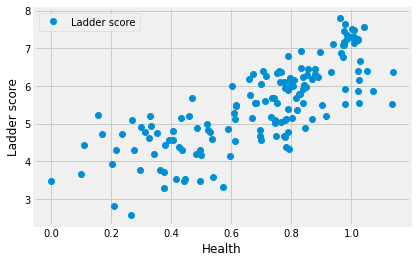

In [48]:
# Step 4: Visualize the change in the variables
import matplotlib.pyplot as plt    
d2020.plot(x ='Health', y ='Ladder score', style ='o' )
plt.xlabel('Health')
plt.ylabel('Ladder score')
plt.show()

**Step 4: Divide the data into train and test sets**

In [49]:
#Divide the data into train and test sets:
 
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.3, random_state=10, shuffle=True)

**Step 5: Have a glance at the shape of the train and test sets:**

In [50]:
#Have a glance at the shape of the train and test sets:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 7)
(46, 7)
(107, 1)
(46, 1)


**Step 6: Train the algorithm**

In [51]:
from sklearn.linear_model import LinearRegression

# Regression model
regressor = LinearRegression()

In [53]:
# Fitting the data to my model
#model = regression.fit(x_train, y_train)
regressor.fit(x_train, y_train)   

LinearRegression()

**Step 7:Having a look at the coefficients that the model has chosen**

In [54]:
# Having a look at the coefficients that the model has chosen:
import pandas as pd

v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(x.columns, columns=['attribute'])

**Step 8: Concatenating the DataFrames to compare**

In [55]:
coeff_d2020 = pd.concat([w,v], axis=1, join='inner')
coeff_d2020

,attribute,Co-efficient
0,GDP per capita,1.166126e-01
1,Social support,2.181179e+00
2,Healthy life expectancy,1.063904e+05
3,Freedom,2.092947e+00
4,Generosity,3.345929e-01
5,Perceptions of corruption,-9.598309e-01
6,Health,-2.955160e+06


**Step 9:Comparing the predicted value to the actual value**

In [56]:
import numpy as np
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred.head(3)

,Predictions
0,5.395633
1,5.862217
2,5.259823


In [57]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3962943704844692
Mean Squared Error: 0.2837987519155517
Root Mean Squared Error: 0.5327276526664931


In [59]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

### Fit and summary:

In [60]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Ladder score   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2082.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                   7.81e-143
Time:                        22:51:37   Log-Likelihood:                         -127.33
No. Observations:                 153   AIC:                                      268.7
Df Residuals:                     146   BIC:                                      289.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Testing the model

In [61]:
tmodel = sm.OLS(y_test, x_test)

resultt = tmodel.fit()

print(resultt.summary())

                                 OLS Regression Results                                
Dep. Variable:           Ladder score   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              938.9
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                    2.09e-41
Time:                        22:51:41   Log-Likelihood:                         -26.099
No. Observations:                  46   AIC:                                      66.20
Df Residuals:                      39   BIC:                                      79.00
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------